# Neural Network
## Thierry Khamphousone - TC-44 IAD-1


### 1)	Analyse des données
Charger la base de données (dataset.dat). Diviser la base de données aléatoirement (fonction train_test_split) en deux corpus (les classes sont équi-représentées dans les deux corpus) : 
-	base d’apprentissage (X_train, y_train) : 70% des données 
-	base de test (X_test, y_test): le reste (30% des données)

Afficher les données d’apprentissage et de test (fonction pyplot.show). 

Préciser la dimension des exemples, le nombre de classe, le nombre d’exemples d’apprentissage et de test.


In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
data_array = np.loadtxt('./dataset.dat')

In [115]:
X = data_array[:, :2];
y = data_array[:, 2];
df = pd.DataFrame({'feature1': X[:,0], 'feature2': X[:,1], 'label': y[:]})

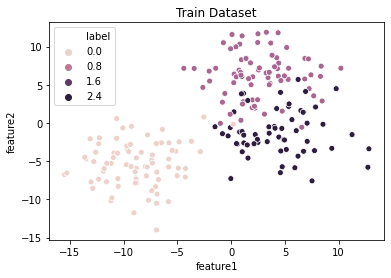

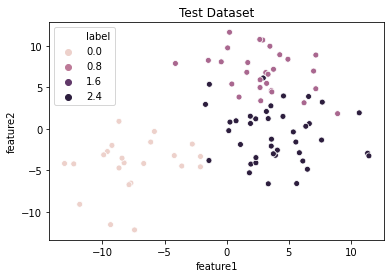

In [119]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:2].values, df.iloc[:,2].values, train_size=0.7, random_state=42)

#Display X_train
df_xtrain = pd.DataFrame({'feature1': X_train[:,0], 'feature2': X_train[:,1], 'label': y_train[:]})
sns.scatterplot('feature1', 'feature2', data=df_xtrain, hue='label', s=35)
plt.title('Train Dataset')
plt.show()

#Display X_test
df_xtest = pd.DataFrame({'feature1': X_test[:,0], 'feature2': X_test[:,1], 'label': y_test[:]})
sns.scatterplot('feature1', 'feature2', data=df_xtest, hue='label', s=35)
plt.title('Test Dataset')
plt.show()

In [120]:
print(np.shape(X_train))
print(np.shape(X_test))

(210, 2)
(90, 2)


Dimension des exemples : 2 features

Nombre de classes : 3

Nombre d'exemples d'apprentissage : 210

Nombre d'exmples de test : 90

## 2)	Algorithme du plus-proche-voisin
a)	Définir un classifieur du (1-)plus-proche-voisin : 
one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')

b)	Le régler sur la base d’apprentissage (fonction fit).

c)	Evaluer le taux de reconnaissance le taux de reconnaissance sur les bases d’apprentissage et de test (fonction score). Déterminer la matrice de confusion.

d)	Afficher les frontières de décision définies par les données d’apprentissage. Vérifier qu’elles correspondent à l’attendu.

e)	Afficher les frontières de décisions et les données de test. Retrouver les erreurs de classification.



In [121]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8


Avec notre base d'entrainement (random_state = 42) qu'on a fit, 

on obtient par la suite un score de 0.8 en testant avec notre base de test. cela signifie que des points sont mal classés 